# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [25]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [3]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [4]:
# Your code here:
customers.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

    1) FRESH: annual spending (m.u.) on fresh products (Continuous)
    2) MILK: annual spending (m.u.) on milk products (Continuous)
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous)
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)
    7) CHANNEL: customers' Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
    8) REGION: customers' Region of Lisnon, Oporto or Other (Nominal) 

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


                  Channel  Region  Fresh  Milk   Grocery  Frozen  \
Channel               1.0     NaN    NaN   NaN       NaN     NaN   
Region                NaN     1.0    NaN   NaN       NaN     NaN   
Fresh                 NaN     NaN    1.0   NaN       NaN     NaN   
Milk                  NaN     NaN    NaN   1.0       NaN     NaN   
Grocery               NaN     NaN    NaN   NaN  1.000000     NaN   
Frozen                NaN     NaN    NaN   NaN       NaN     1.0   
Detergents_Paper      NaN     NaN    NaN   NaN  0.924641     NaN   
Delicassen            NaN     NaN    NaN   NaN       NaN     NaN   

                  Detergents_Paper  Delicassen  
Channel                        NaN         NaN  
Region                         NaN         NaN  
Fresh                          NaN         NaN  
Milk                           NaN         NaN  
Grocery                   0.924641         NaN  
Frozen                         NaN         NaN  
Detergents_Paper          1.000000         N

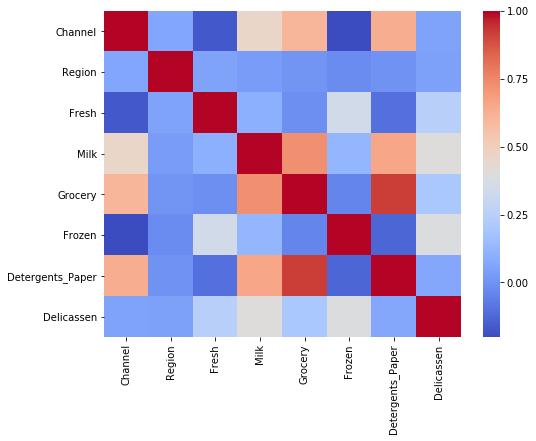

In [8]:
corr = customers.corr()
print(corr[corr > 0.8])
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='coolwarm')

In [9]:
customers.skew()

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

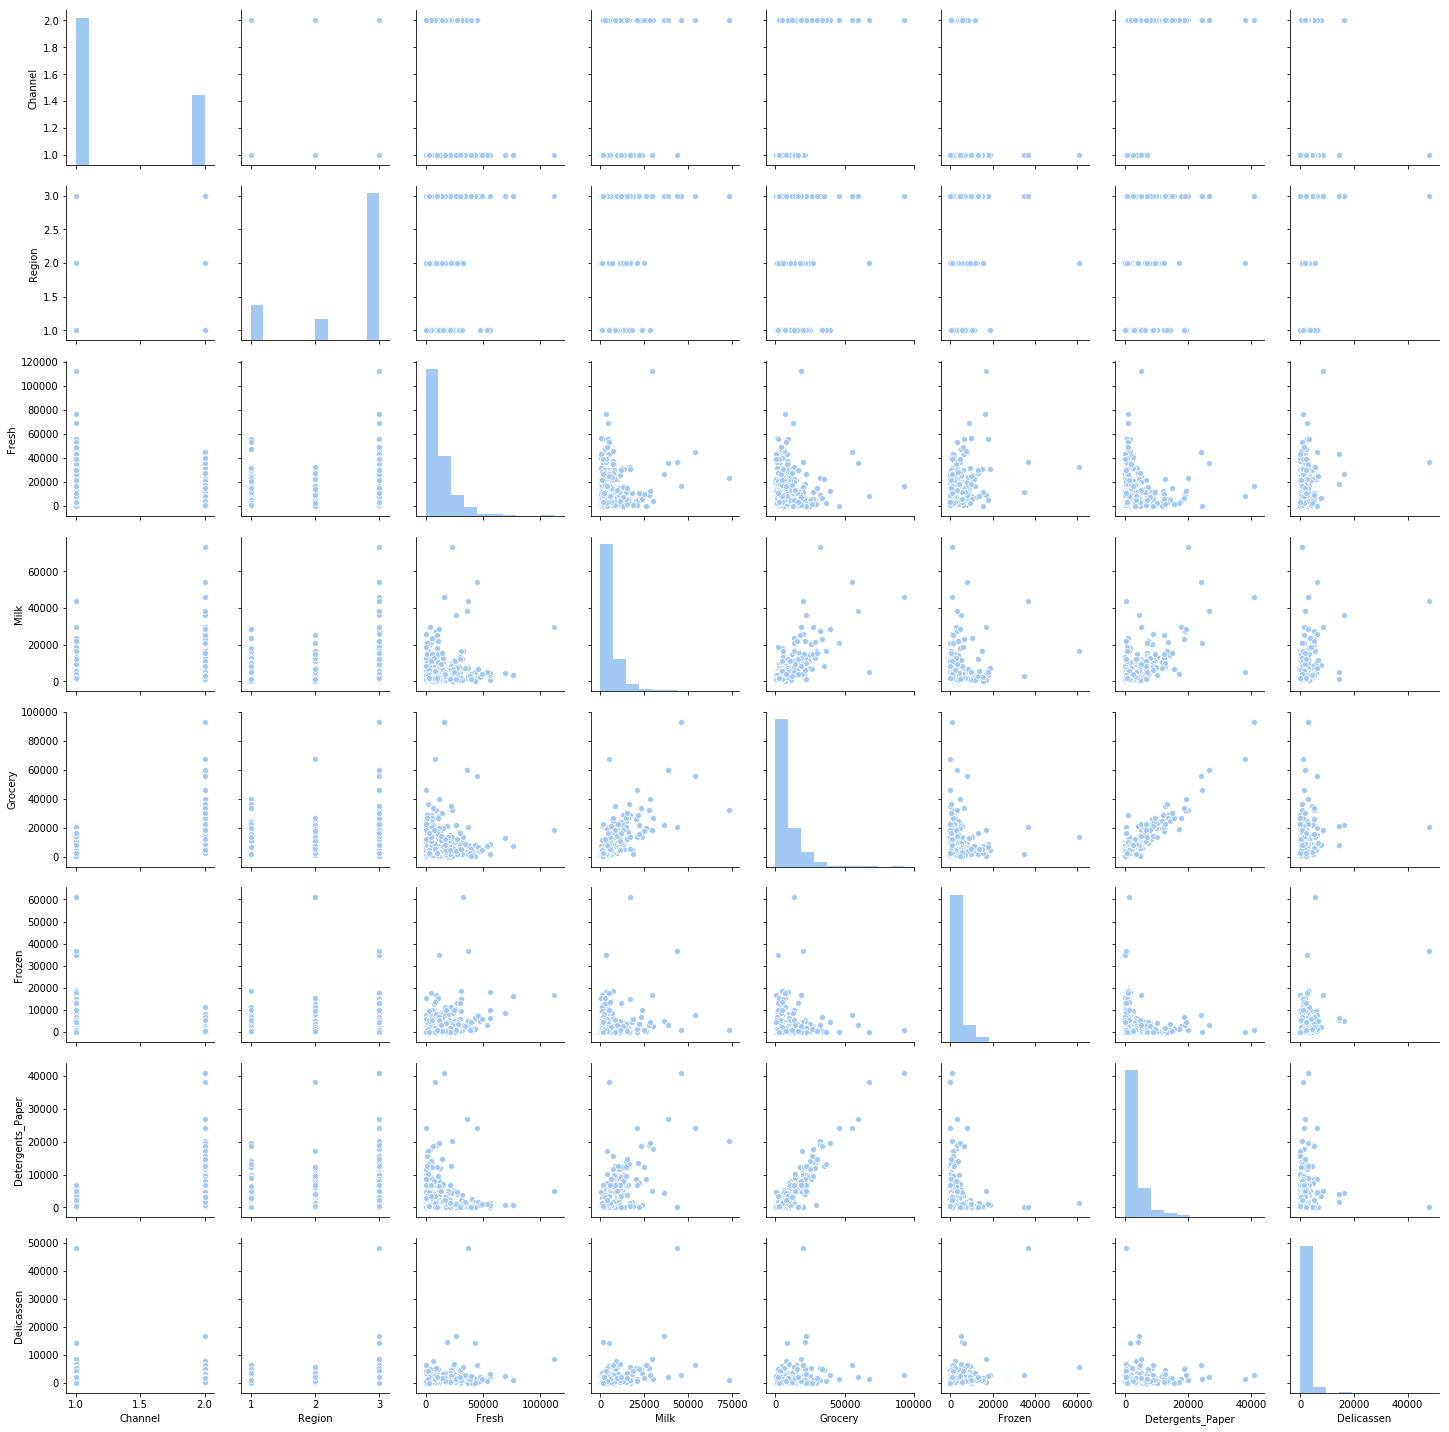

In [18]:
sns.pairplot(customers)

In [24]:
customers['Channel'].unique()

array([2, 1])

In [25]:
customers['Region'].unique()

array([3, 1, 2])

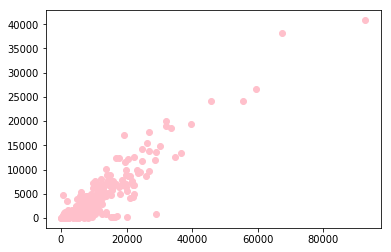

In [30]:
pyplot.scatter(customers['Grocery'], customers['Detergents_Paper'], color='pink')
pyplot.show()

In [32]:
print(np.mean(customers['Grocery']), np.std(customers['Grocery']))
print(np.mean(customers['Detergents_Paper']), np.std(customers['Detergents_Paper']))

7951.277272727273 9492.357637519479
2881.4931818181817 4762.43334956453


In [ ]:
# Your observations here
# The columns Region and Channel seems to be categorical
# The columns Detergents_Paper and Grocery are highly correlated

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [10]:
# Your code here
customers_cl = customers.drop('Detergents_Paper', axis=1)

In [11]:
customers_cl =pd.get_dummies(customers_cl, columns =['Channel', 'Region'])

In [14]:
customers_cl.dtypes

Fresh         int64
Milk          int64
Grocery       int64
Frozen        int64
Delicassen    int64
Channel_1     uint8
Channel_2     uint8
Region_1      uint8
Region_2      uint8
Region_3      uint8
dtype: object

In [ ]:
# Your comment here
# Given the correlation between Groceries and Detergets_Paper, I decided to drop one of them
# Given Region and Channel seems to be categorical I manage to make them 0-1

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [17]:
# Your import here:
from sklearn.preprocessing import StandardScaler

# Your code here:
scaler=StandardScaler()
customers_scale = pd.DataFrame(scaler.fit_transform(customers_cl), columns =customers_cl.columns)

In [18]:
customers_scale.head()

,Fresh,Milk,Grocery,Frozen,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,0.052933,0.523568,-0.041115,-0.589367,-0.066339,-1.448652,1.448652,-0.460566,-0.345822,0.626422
1,-0.391302,0.544458,0.170318,-0.270136,0.089151,-1.448652,1.448652,-0.460566,-0.345822,0.626422
2,-0.447029,0.408538,-0.028157,-0.137536,2.243293,-1.448652,1.448652,-0.460566,-0.345822,0.626422
3,0.100111,-0.624020,-0.392977,0.687144,0.093411,0.690297,-0.690297,-0.460566,-0.345822,0.626422
4,0.840239,-0.052396,-0.079356,0.173859,1.299347,-1.448652,1.448652,-0.460566,-0.345822,0.626422


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [74]:
# Your code here:
# I'm not sure about doing 2 or 4 clusters, or even more, but I finally decided go for 3
kmeans = KMeans(n_clusters=3).fit(customers_scale)
customers['labels']= kmeans.labels_

Count the values in `labels`.

In [66]:
# Your code here:
customers['labels'].value_counts()

2    238
0    136
1     66
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [30]:
# Your code here
clustering = DBSCAN(eps=0.5).fit(customers_scale)
customers['labels_DBSCAN']= clustering.labels_

Count the values in `labels_DBSCAN`.

In [31]:
# Your code here
customers['labels_DBSCAN'].value_counts()

-1    222
 2    138
 0     31
 4     23
 6      7
 5      7
 1      7
 3      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

In [67]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,0,0
1,2,3,7057,9810,9568,1762,3293,1776,0,0
2,2,3,6353,8808,7684,2405,3516,7844,0,-1
3,1,3,13265,1196,4221,6404,507,1788,2,2
4,2,3,22615,5410,7198,3915,1777,5185,0,-1


Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

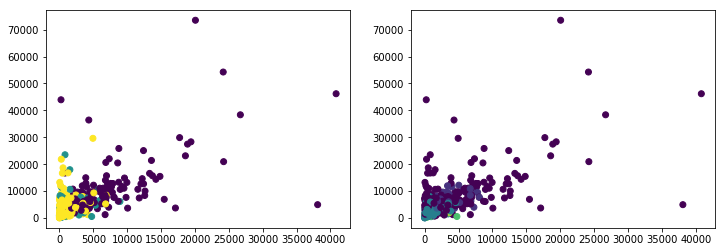

In [68]:
# Your code here:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels'])
plt.subplot(1,2,2)
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels_DBSCAN'])

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

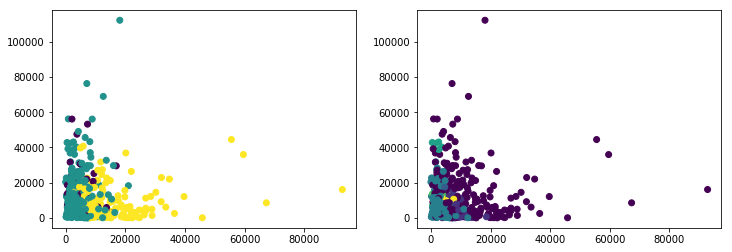

In [89]:
# Your code here:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(customers['Grocery'], customers['Fresh'], c=customers['labels'])
plt.subplot(1,2,2)
plt.scatter(customers['Grocery'], customers['Fresh'], c=customers['labels_DBSCAN'])

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

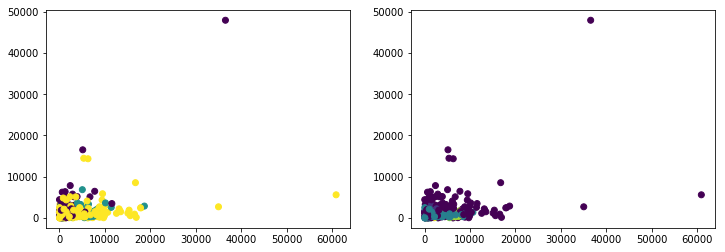

In [70]:
# Your code here:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels'])
plt.subplot(1,2,2)
plt.scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels_DBSCAN'])

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [71]:
# Your code here:
display(customers.groupby('labels').agg('mean'))
display(customers.groupby('labels_DBSCAN').agg('mean'))

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,,
0,1.992647,2.698529,9236.948529,11225.860294,16736.492647,1840.419118,7379.985294,2108.220588,-0.669118
1,1.106061,1.000000,12216.196970,4050.272727,4536.272727,3112.424242,1286.545455,1224.924242,1.378788
2,1.000000,2.882353,13519.483193,3177.823529,3878.172269,3764.424370,753.222689,1274.705882,1.029412


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,
-1,1.468468,2.396396,14848.144144,8729.409910,11932.941441,4180.045045,4482.184685,2222.193694,0.954955
0,2.000000,3.000000,4580.290323,7785.032258,10442.096774,803.354839,4613.419355,1400.516129,0.000000
1,2.000000,3.000000,12530.857143,3213.000000,6117.857143,868.571429,2879.571429,350.857143,0.000000
2,1.000000,3.000000,8835.507246,2004.289855,2751.543478,2100.775362,629.253623,740.869565,2.000000
3,1.000000,3.000000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,2.000000
4,1.000000,1.000000,9491.391304,1700.782609,2092.565217,1488.695652,526.478261,648.782609,1.000000
5,1.000000,1.000000,7059.000000,1941.285714,2302.714286,6526.571429,844.571429,667.000000,1.000000
6,1.000000,2.000000,8555.714286,1742.285714,4017.142857,2354.428571,385.714286,855.571429,2.000000


Which algorithm appears to perform better?

In [ ]:
# Your observations here
# I would say the algorithm of K-Means is better since it gives us the chance to adjust the
# size of the clusters

https://medium.com/@soroushhashemifar/kmeans-vs-dbscan-d9d5f9dbee8b

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [79]:
# Your code here
kmeans2 = KMeans(n_clusters=2).fit(customers_scale)
customers['labels2']= kmeans2.labels_

In [80]:
kmeans4 = KMeans(n_clusters=4).fit(customers_scale)
customers['labels4']= kmeans4.labels_

In [81]:
kmeans8 = KMeans(n_clusters=8).fit(customers_scale)
customers['labels8']= kmeans8.labels_

In [82]:
display(customers.groupby('labels2').agg('mean'))
display(customers.groupby('labels').agg('mean'))
display(customers.groupby('labels4').agg('mean'))
display(customers.groupby('labels8').agg('mean'))

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN,labels4,labels8
labels2,,,,,,,,,,,,
0,1.000000,2.508418,13396.868687,3315.367003,3907.565657,3637.861953,792.417508,1259.299663,0.801347,1.154882,0.680135,4.565657
1,1.993007,2.615385,9099.727273,10948.902098,16349.755245,1896.538462,7220.342657,2076.440559,1.902098,-0.685315,1.370629,4.657343


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN,labels2,labels4,labels8
labels,,,,,,,,,,,,
0,1.106061,1.000000,12216.196970,4050.272727,4536.272727,3112.424242,1286.545455,1224.924242,1.378788,0.106061,2.000000,4.000000
1,1.000000,2.882353,13519.483193,3177.823529,3878.172269,3764.424370,753.222689,1274.705882,1.029412,0.000000,0.352941,4.705882
2,1.992647,2.698529,9236.948529,11225.860294,16736.492647,1840.419118,7379.985294,2108.220588,-0.669118,1.000000,1.338235,4.691176


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN,labels2,labels8
labels4,,,,,,,,,,,,
0,1.000000,3.000000,13768.676190,3294.300000,3809.195238,3500.342857,789.290476,1297.214286,1.000000,1.066667,0.000000,5.071429
1,1.990826,2.944954,9999.449541,11605.633028,16560.422018,1899.825688,7119.000000,2278.532110,2.000000,-0.587156,1.000000,4.339450
2,1.202703,1.000000,11270.918919,4789.135135,6219.878378,2964.391892,2065.189189,1292.729730,0.216216,1.121622,0.202703,4.000000
3,1.404255,2.000000,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128,1.404255,0.042553,0.404255,4.000000


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN,labels2,labels4
labels8,,,,,,,,,,,,
0,2.000000,2.571429,13519.214286,33063.214286,39376.428571,2811.071429,18518.214286,4144.928571,2.000000,-1.000000,1.000000,1.000
1,1.000000,2.975000,34334.175000,4934.850000,5594.625000,10488.825000,872.175000,2671.450000,1.000000,-0.350000,0.000000,0.075
2,1.000000,2.000000,10870.296296,1767.962963,4053.629630,3703.407407,453.481481,939.111111,1.000000,0.814815,0.000000,3.000
3,1.000000,3.000000,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000,2.000000,-1.000000,1.000000,1.000
4,1.202703,1.000000,11270.918919,4789.135135,6219.878378,2964.391892,2065.189189,1292.729730,0.216216,1.121622,0.202703,2.000
5,2.000000,3.000000,9189.617021,8065.734043,13123.893617,1395.659574,5494.436170,1514.765957,2.000000,-0.521277,1.000000,1.000
6,1.000000,3.000000,9068.842105,2989.432749,3448.959064,2201.099415,772.725146,1000.970760,1.000000,1.385965,0.000000,0.000
7,2.000000,2.000000,7289.789474,9190.789474,16326.315789,1540.578947,8410.263158,1239.000000,2.000000,-1.000000,1.000000,3.000


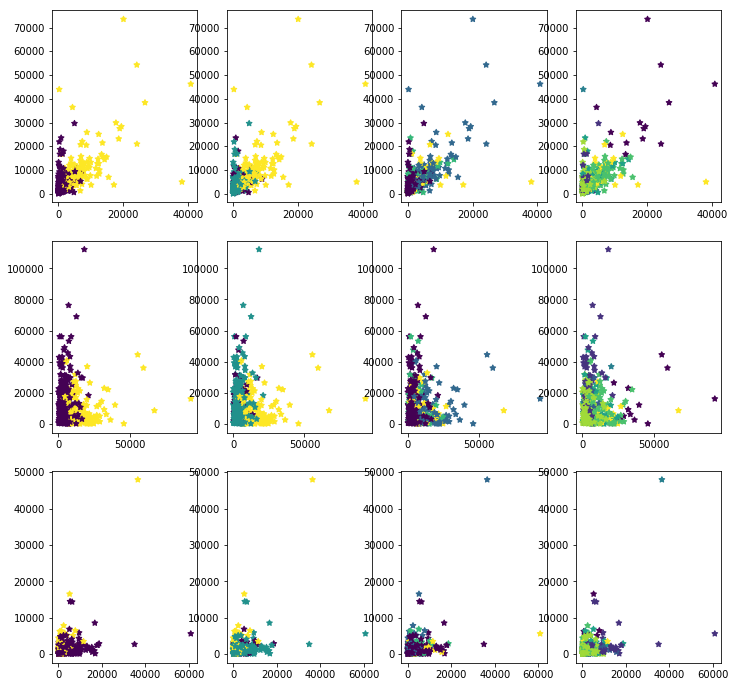

In [92]:
plt.figure(figsize=(12,12))
plt.subplot(3,4,1)
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels2'], marker=(5, 1))
plt.subplot(3,4,2)
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels'],marker=(5, 1))
plt.subplot(3,4,3)
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels4'],marker=(5, 1))
plt.subplot(3,4,4)
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels8'],marker=(5, 1))
plt.subplot(3,4,5)
plt.scatter(customers['Grocery'], customers['Fresh'], c=customers['labels2'], marker=(5, 1))
plt.subplot(3,4,6)
plt.scatter(customers['Grocery'], customers['Fresh'], c=customers['labels'], marker=(5, 1))
plt.subplot(3,4,7)
plt.scatter(customers['Grocery'], customers['Fresh'], c=customers['labels4'], marker=(5, 1))
plt.subplot(3,4,8)
plt.scatter(customers['Grocery'], customers['Fresh'], c=customers['labels8'], marker=(5, 1))
plt.subplot(3,4,9)
plt.scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels2'], marker=(5, 1))
plt.subplot(3,4,10)
plt.scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels'], marker=(5, 1))
plt.subplot(3,4,11)
plt.scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels4'], marker=(5, 1))
plt.subplot(3,4,12)
plt.scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels8'], marker=(5, 1))

In [ ]:
# Your comment here
# As it can be seen in the figure, the only one which represents the differences between clusters is the k=2
# The other ones only add colors to the same area, making more difficult to differences those clusters

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [97]:
# Your code here
clustering1 = DBSCAN(eps=0.7, min_samples= 5).fit(customers_scale)
customers['labels_DBSCAN1']= clustering1.labels_

In [98]:
clustering2 = DBSCAN(eps=1, min_samples = 10).fit(customers_scale)
customers['labels_DBSCAN2']= clustering2.labels_

In [99]:
clustering3 = DBSCAN(eps=1, min_samples = 20).fit(customers_scale)
customers['labels_DBSCAN3']= clustering3.labels_

In [100]:
# Your comment here
display(customers.groupby('labels_DBSCAN').agg('mean'))
display(customers.groupby('labels_DBSCAN1').agg('mean'))
display(customers.groupby('labels_DBSCAN2').agg('mean'))
display(customers.groupby('labels_DBSCAN3').agg('mean'))

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels2,labels4,labels8,labels_DBSCAN1,labels_DBSCAN2,labels_DBSCAN3
labels_DBSCAN,,,,,,,,,,,,,,,
-1,1.468468,2.396396,14848.144144,8729.409910,11932.941441,4180.045045,4482.184685,2222.193694,1.279279,0.472973,1.256757,3.941441,0.211712,0.157658,-0.220721
0,2.000000,3.000000,4580.290323,7785.032258,10442.096774,803.354839,4613.419355,1400.516129,2.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000
1,2.000000,3.000000,12530.857143,3213.000000,6117.857143,868.571429,2879.571429,350.857143,2.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000
2,1.000000,3.000000,8835.507246,2004.289855,2751.543478,2100.775362,629.253623,740.869565,1.000000,0.000000,0.000000,5.927536,1.000000,1.000000,1.000000
3,1.000000,3.000000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,-0.600000
4,1.000000,1.000000,9491.391304,1700.782609,2092.565217,1488.695652,526.478261,648.782609,0.000000,0.000000,2.000000,4.000000,3.000000,2.000000,2.000000
5,1.000000,1.000000,7059.000000,1941.285714,2302.714286,6526.571429,844.571429,667.000000,0.000000,0.000000,2.000000,4.000000,3.000000,2.000000,2.000000
6,1.000000,2.000000,8555.714286,1742.285714,4017.142857,2354.428571,385.714286,855.571429,1.000000,0.000000,3.000000,2.000000,4.000000,3.000000,-1.000000


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN,labels2,labels4,labels8,labels_DBSCAN2,labels_DBSCAN3
labels_DBSCAN1,,,,,,,,,,,,,,,
-1,1.5,2.327586,18355.474138,11377.982759,14831.267241,5859.974138,5561.818966,3079.594828,1.301724,-1.000000,0.508621,1.258621,3.405172,-0.560345,-0.784483
0,2.0,3.000000,7689.784810,7752.405063,12166.240506,1289.405063,5341.367089,1286.949367,2.000000,-0.430380,1.000000,1.000000,5.000000,0.000000,-0.012658
1,1.0,3.000000,9609.139394,2554.642424,3204.327273,2403.157576,715.315152,881.472727,1.000000,1.509091,0.000000,0.000000,5.787879,1.000000,1.000000
2,1.0,3.000000,41076.833333,1422.833333,1933.666667,1815.333333,362.333333,1045.000000,1.000000,2.333333,0.000000,0.000000,1.000000,1.000000,-0.666667
3,1.0,1.000000,9753.244898,2729.734694,3100.489796,2407.959184,889.755102,842.163265,0.000000,2.204082,0.000000,2.000000,4.000000,2.000000,1.938776
4,1.0,2.000000,10280.200000,1780.750000,3948.150000,2048.250000,507.800000,831.300000,1.000000,1.450000,0.000000,3.000000,2.000000,3.000000,-1.000000
5,2.0,2.000000,5584.200000,3729.200000,9159.800000,732.400000,5352.600000,487.200000,2.000000,-1.000000,1.000000,3.000000,7.000000,-1.000000,-1.000000


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN,labels2,labels4,labels8,labels_DBSCAN1,labels_DBSCAN3
labels_DBSCAN2,,,,,,,,,,,,,,,
-1,1.604167,2.166667,18474.812500,12482.583333,16254.822917,6049.822917,6439.958333,3196.750000,1.364583,-1.000000,0.614583,1.53125,3.458333,-0.687500,-1.000000
0,2.000000,3.000000,7724.464286,7803.226190,12687.654762,1338.916667,5403.630952,1302.178571,2.000000,-0.464286,1.000000,1.00000,5.000000,-0.059524,-0.035714
1,1.000000,3.000000,11306.255319,2768.159574,3372.351064,2559.659574,750.702128,1020.085106,1.000000,1.308511,0.000000,0.00000,5.468085,0.851064,0.882979
2,1.000000,1.000000,9753.244898,2729.734694,3100.489796,2407.959184,889.755102,842.163265,0.000000,2.204082,0.000000,2.00000,4.000000,3.000000,1.938776
3,1.000000,2.000000,11052.565217,1842.913043,3756.956522,2573.565217,477.652174,940.434783,1.000000,1.130435,0.000000,3.00000,2.000000,3.347826,-1.000000


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN,labels2,labels4,labels8,labels_DBSCAN1,labels_DBSCAN2
labels_DBSCAN3,,,,,,,,,,,,,,,
-1,1.455224,2.216418,18129.694030,9906.007463,13172.686567,5127.305970,4922.276119,2622.395522,1.276119,-0.514925,0.462687,1.649254,3.156716,0.119403,-0.104478
0,2.000000,3.000000,7645.716049,7624.765432,12379.123457,1302.641975,5402.049383,1280.851852,2.000000,-0.444444,1.000000,1.000000,5.000000,-0.037037,0.000000
1,1.000000,3.000000,10085.615819,2667.107345,3278.440678,2510.333333,718.751412,989.502825,1.000000,1.361582,0.000000,0.000000,5.661017,0.881356,1.000000
2,1.000000,1.000000,9297.812500,2776.416667,3133.937500,2390.583333,905.979167,846.895833,0.000000,2.270833,0.000000,2.000000,4.000000,3.000000,2.000000


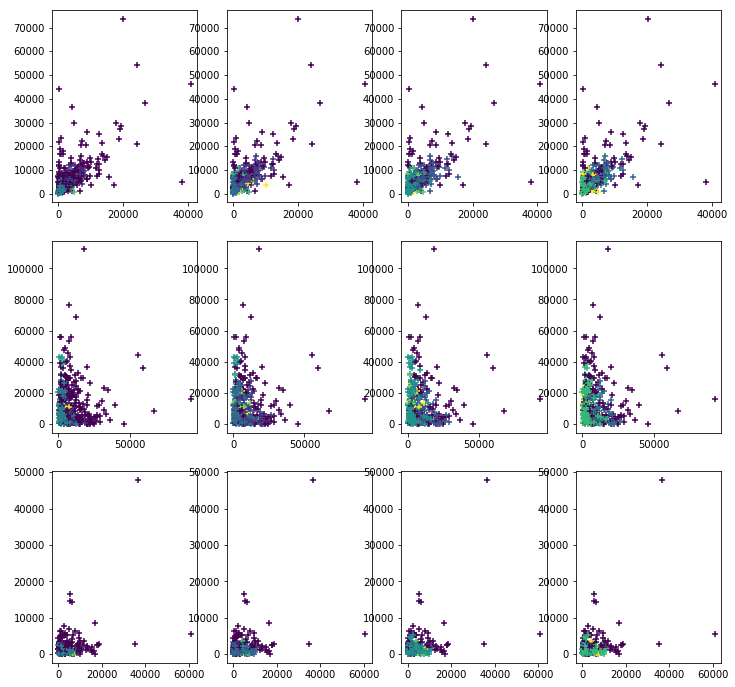

In [106]:
plt.figure(figsize=(12,12))
plt.subplot(3,4,1)
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels_DBSCAN'], marker='+')
plt.subplot(3,4,2)
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels_DBSCAN1'],marker='+')
plt.subplot(3,4,3)
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels_DBSCAN2'],marker='+')
plt.subplot(3,4,4)
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels_DBSCAN3'],marker='+')
plt.subplot(3,4,5)
plt.scatter(customers['Grocery'], customers['Fresh'], c=customers['labels_DBSCAN'], marker='+')
plt.subplot(3,4,6)
plt.scatter(customers['Grocery'], customers['Fresh'], c=customers['labels_DBSCAN1'], marker='+')
plt.subplot(3,4,7)
plt.scatter(customers['Grocery'], customers['Fresh'], c=customers['labels_DBSCAN2'], marker='+')
plt.subplot(3,4,8)
plt.scatter(customers['Grocery'], customers['Fresh'], c=customers['labels_DBSCAN3'], marker='+')
plt.subplot(3,4,9)
plt.scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels_DBSCAN'], marker='+')
plt.subplot(3,4,10)
plt.scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels_DBSCAN1'], marker='+')
plt.subplot(3,4,11)
plt.scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels_DBSCAN2'], marker='+')
plt.subplot(3,4,12)
plt.scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels_DBSCAN3'], marker='+')

In [107]:
# I would say the same I said with the kmeans logarithm, although in this case I would stay with the eps=0.5
# the original setting